In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from deepspace_helper import all_cards, all_clothing, Card, Clothing, Analyzer, SlotMachine, StarDice, Diamond

In [2]:
# 构造概率表
sd_100 = StarDice(100)
sd_50 = StarDice(50)
sd_20 = StarDice(20)
sd_10 = StarDice(10)
sd_5 = StarDice(5)

sxh_shower_card, ls_shower_card, qy_shower_card = all_cards["shower_card"]
duck_clothing, bamboo_clothing, horn_clothing = all_clothing["shower_clothing"]

chance_table = {
    sxh_shower_card: 1 / 300,
    ls_shower_card: 1 / 300,
    qy_shower_card: 1 / 300,
    duck_clothing: 0.01,
    bamboo_clothing: 0.01,
    horn_clothing: 0.01,
    sd_100: 0.04,
    sd_50: 0.12,
    sd_20: 0.15,
    sd_10: 0.5,
    sd_5: 0.15
}

In [3]:
# 构造老虎机和分析器
sm = SlotMachine(per_cost=Diamond(100), chance_table=chance_table)
ana = Analyzer(
    slot_machine=sm
)

## 按给定投入实验

沈星回: 0.305


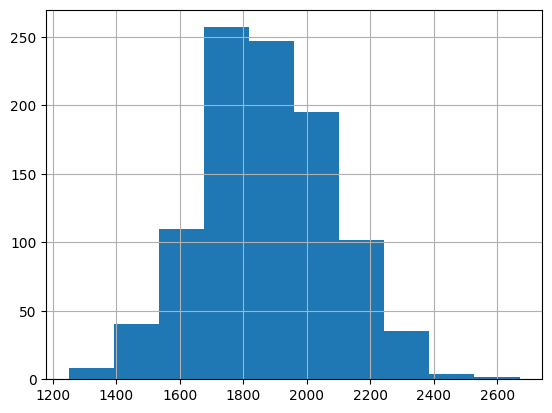

In [21]:
n_samples = 1000
result_df = ana.roll_by_coins(10000, n_samples=n_samples)

# 查看出货概率
sxh_ratio = len(result_df[result_df[sxh_shower_card] >= 1]) / n_samples
print("沈星回:", sxh_ratio)

# 画图
fig, ax = plt.subplots()
result_df[StarDice(1)].hist(ax=ax)
fig.savefig('star_dice_hist.png')

## 按给定目标实验

In [22]:
# 设定目标
target = {
    sxh_shower_card: 1,
    ls_shower_card: 1,
    qy_shower_card: 1,
}

In [23]:
# 朴素计算
naive_result = ana.roll_by_target_naive(
    target,
    step=10,
    n_samples=1000
)
print("naive_result", naive_result["total_cost"].mean())

naive_result 10854.0


In [24]:
# 二分计算
bin_result = ana.roll_by_target_bin(
    target,
    n_samples=1000
)

print("bin_search:", bin_result["total_cost"].mean())

bin_search: 10334.7


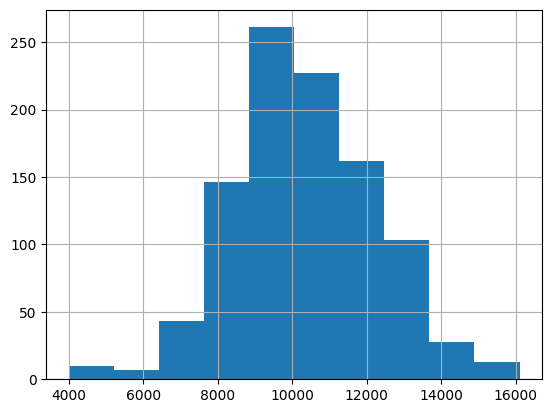

In [26]:
# 画图
fig, ax = plt.subplots()
bin_result["total_cost"].hist(ax=ax)
fig.savefig('total_cost_hist.png')

In [41]:
# 只要一张卡，这里用沈星回举例
target1 = {
    sxh_shower_card: 1,
    StarDice(1): 300
}

# 三种卡各要一张
target2 = {
    sxh_shower_card: 1,
    ls_shower_card: 1,
    qy_shower_card: 1,
}

# 单张卡满破，这里用沈星回举例
target3 = {
    sxh_shower_card: 4
}

naive_result 5773.4
naive_result 10351.9
naive_result 16496.0


'\nnaive_result 4432.1\nnaive_result 10283.6\nnaive_result 16733.0\n'

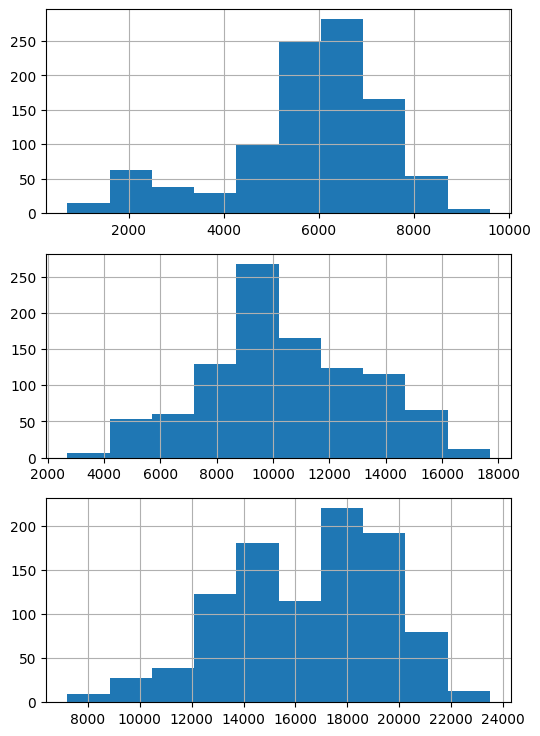

In [42]:
fig, ax_array = plt.subplots(nrows=3, ncols=1, figsize=(6, 9))

for i, t in enumerate([target1, target2, target3]):
    naive_result = ana.roll_by_target_naive(
        target=t,
        step=1,
        n_samples=1000
    )
    print("naive_result", naive_result["total_cost"].mean())
    
    naive_result["total_cost"].hist(ax=ax_array[i])
    
fig.savefig('common_scenes.png')
    
"""
naive_result 4432.1
naive_result 10283.6
naive_result 16733.0
"""

In [74]:
bin_result = ana.roll_by_target_bin(
    target = {
        sxh_shower_card: 4,
        ls_shower_card: 4,
        qy_shower_card: 4
    },
    init_value=300,
    n_samples=1000
)